# Pymaceuticals Inc.
---

### Analysis

- There was a total of 249 mice used to test the tumor volume size based on 10 different drug regimens.<br><br>
- In the bar chart of mice per drug regimen, there are 10 treatments used for the study. The highest number of mice in the strudy are treated using Capomulin, while the lowest number of mice in the study are treated using Propriva.<br><br>
- The sex ratio of mice is 51% males and 49% females. This shows that the studies were balanced in regards to the sex differences of the drug regimens.<br><br>
- In the box plot across 4 regimens, the final tumor volume treated by Capommulin and Ramicane trended lower than the others. Ramicane showed to have lower final tumor volume, however it was used with a lower treatment than Capomulin. In order to get results that are unbiased, equal treatments and variables are needed to test.<br><br>
-  Capomulin was used to treate mouse "l509" and the tumor volume seemed to decrease overtime.<br><br>
- The correlation between Capomulin average weight and final tumor volume indicate that the value is 0.84. Meaning, there is a strong positive correlation between the two variables. The r-squared value of 0.71 indicates that the final tumor volume could be predicted by using the average weight of a mouse. 
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [24]:
# Checking the number of mice.
totalmice = len(merged_df['Mouse ID'].unique())
totalmice

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
dup_mice_id = merged_df.loc[dup_mice, 'Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id_data = merged_df.loc[merged_df['Mouse ID'] == dup_mice_id[0]]
dup_mice_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = merged_df.drop(dup_mice_id_data.index)
cleandf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [28]:
# Checking the number of mice in the clean DataFrame.
numofmice = len(cleandf['Mouse ID'].unique())
numofmice

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugreg = cleandf.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
gpmean = drugreg['Tumor Volume (mm3)'].mean()
gpmedian = drugreg['Tumor Volume (mm3)'].median()
gpvar = drugreg['Tumor Volume (mm3)'].var()
gpstd = drugreg['Tumor Volume (mm3)'].std()
gbsem = drugreg['Tumor Volume (mm3)'].sem()

summarystats_df = pd.DataFrame({
    "Mean Tumor Volume" : gpmean,
    "Median Tumor Volume" : gpmedian,
    "Tumor Volume Variance" : gpvar,
    "Tumor Volume Std. Dev." : gpstd,
    "Tumor Volume Std. Err." : gbsem
})
summarystats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summarytable = drugreg['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summarytable = summarytable.style.set_caption("Tumor Volume (mm3)")
summarytable

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

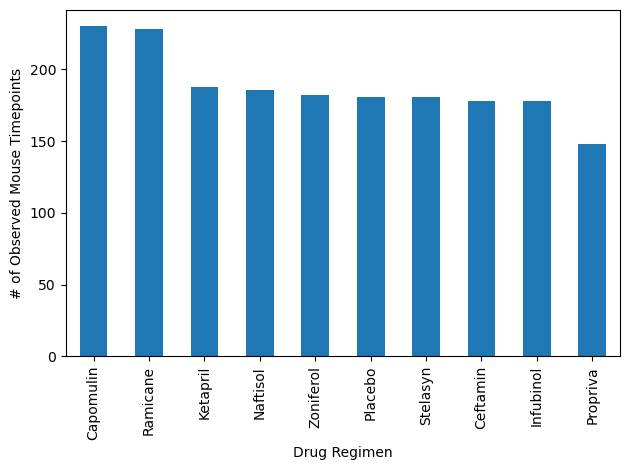

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pdbar_miceperreg = drugreg['Mouse ID'].count().sort_values(ascending=False).plot(kind='bar')
pdbar_miceperreg.set_ylabel('# of Observed Mouse Timepoints')
pdbar_miceperreg.set_xlabel('Drug Regimen')
plt.tight_layout()
plt.show

In [32]:
# Calculate mice per regimen
numofmiceperreg = drugreg['Mouse ID'].count().sort_values(ascending=False)
numofmiceperreg

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

<BarContainer object of 10 artists>

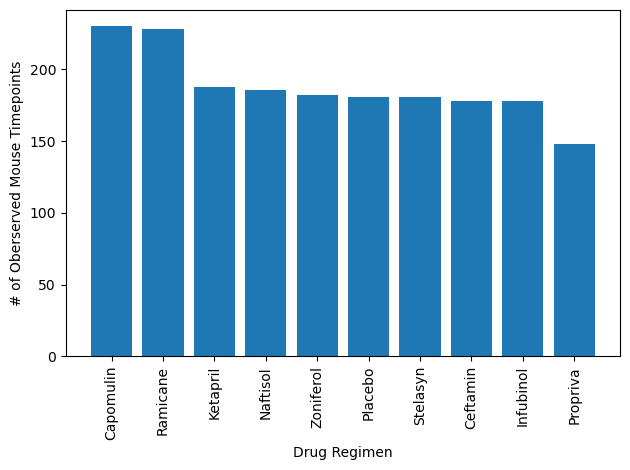

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pybarmiceperreg = plt.bar(numofmiceperreg.index, numofmiceperreg.values)
plt.ylabel("# of Oberserved Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.tight_layout()
pybarmiceperreg

In [34]:
# Calculate number of mice per sex
micesex = cleandf.groupby('Sex')['Sex'].count()
micesex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

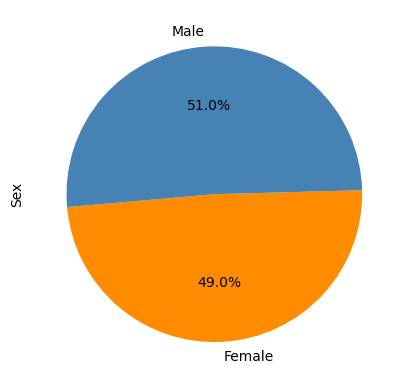

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Set colors to match example
colors = ['darkorange', 'steelblue']

pdpie_micesex = micesex.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=185)
pdpie_micesex.set_ylabel('Sex')
plt.show()

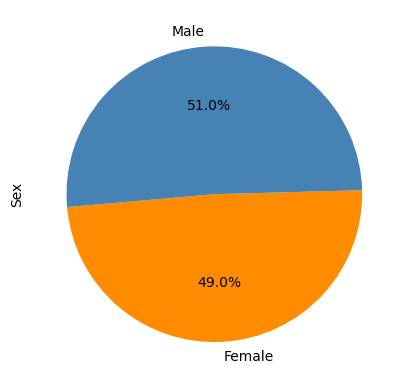

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pypie_micesex = plt.pie(micesex, labels=micesex.index, autopct='%1.1f%%', colors=colors, startangle=185)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatesttimepoint = cleandf.groupby(["Mouse ID"])["Timepoint"].max()
greatesttimepoint = greatesttimepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaltumor = greatesttimepoint.merge(merged_df, on=(["Mouse ID","Timepoint"]), how = "left")

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for numofmiceperreg in treatmentlist:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finaltumorvol = finaltumor.loc[finaltumor["Drug Regimen"] == numofmiceperreg, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumorvol_list.append(finaltumorvol)
    
    # Determine outliers using upper and lower bounds
    quartiles = finaltumorvol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    outliers = finaltumorvol[(finaltumorvol < lowerbound) | (finaltumorvol > upperbound)]
    print(f"{numofmiceperreg}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


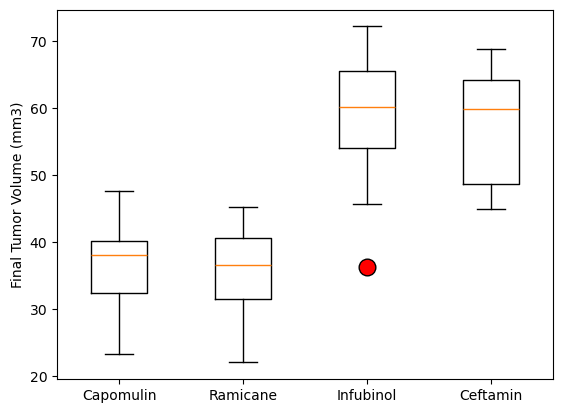

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlierplot = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumorvol_list, labels= treatmentlist, flierprops=outlierplot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

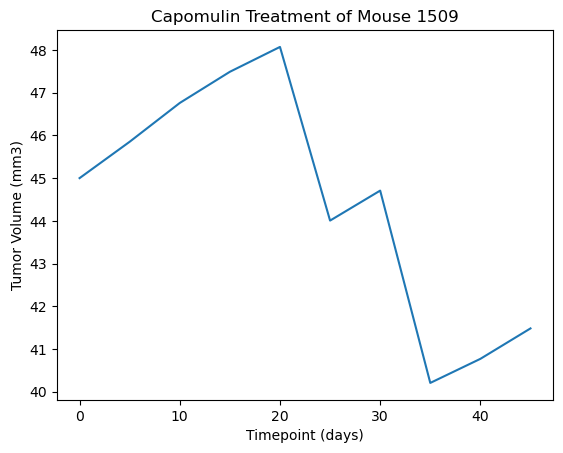

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = cleandf.loc[cleandf['Mouse ID'] == "l509",:]

l509x = l509["Timepoint"]
l509y = l509["Tumor Volume (mm3)"]
l509 = plt.plot(l509x, l509y)

plt.title('Capomulin Treatment of Mouse 1509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

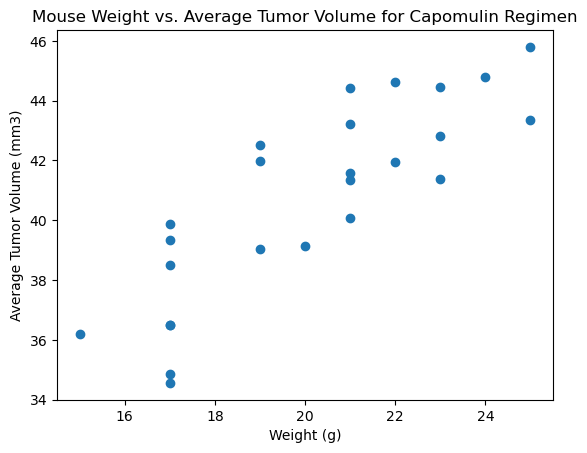

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulindf = cleandf[cleandf['Drug Regimen'] == 'Capomulin']
avgtumorvol = capomulindf.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulinmerged = avgtumorvol.merge(mouse_metadata, on='Mouse ID')

plt.scatter(capomulinmerged['Weight (g)'], capomulinmerged['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

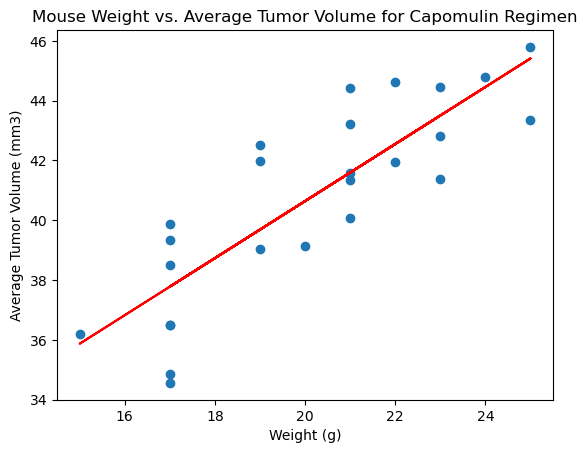

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulinmerged['Weight (g)'], capomulinmerged['Tumor Volume (mm3)'])[0]
slope, intercept, r_value, p_value, std_err = st.linregress(capomulinmerged['Weight (g)'], capomulinmerged['Tumor Volume (mm3)'])

regressvalues = capomulinmerged['Weight (g)'] * slope + intercept
plt.scatter(capomulinmerged['Weight (g)'], capomulinmerged['Tumor Volume (mm3)'])
plt.plot(capomulinmerged['Weight (g)'], regressvalues, "r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()